<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Case-Study-12---Simulation-Study-of-a-Branching-Process" data-toc-modified-id="Case-Study-12---Simulation-Study-of-a-Branching-Process-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study 12 - Simulation Study of a Branching Process</a></span><ul class="toc-item"><li><span><a href="#Abstract:" data-toc-modified-id="Abstract:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Abstract:</a></span></li></ul></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Methods" data-toc-modified-id="Methods-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Methods</a></span><ul class="toc-item"><li><span><a href="#Monte-Carlo-generation-of-3-Exponential(1)-rv's" data-toc-modified-id="Monte-Carlo-generation-of-3-Exponential(1)-rv's-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Monte Carlo generation of 3 Exponential(1) rv's</a></span></li><li><span><a href="#Exploring-the-random-process" data-toc-modified-id="Exploring-the-random-process-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Exploring the random process</a></span></li><li><span><a href="#Profiling-code-performance" data-toc-modified-id="Profiling-code-performance-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Profiling code performance</a></span></li><li><span><a href="#Family-tree" data-toc-modified-id="Family-tree-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Family tree</a></span></li><li><span><a href="#Replicating-the-simulation" data-toc-modified-id="Replicating-the-simulation-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Replicating the simulation</a></span></li></ul></li><li><span><a href="#Q.6---Make-a-Custom-Visualization" data-toc-modified-id="Q.6---Make-a-Custom-Visualization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Q.6 - Make a Custom Visualization</a></span><ul class="toc-item"><li><span><a href="#Dendrograms-and-Phylogenetic-Fans" data-toc-modified-id="Dendrograms-and-Phylogenetic-Fans-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Dendrograms and Phylogenetic Fans</a></span><ul class="toc-item"><li><span><a href="#Dendrograms-and-Phylogenetic-Fans-with-Groupby" data-toc-modified-id="Dendrograms-and-Phylogenetic-Fans-with-Groupby-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Dendrograms and Phylogenetic Fans with Groupby</a></span></li><li><span><a href="#Dendrograms-and-Phylogenetic-Fans-with-Groupby" data-toc-modified-id="Dendrograms-and-Phylogenetic-Fans-with-Groupby-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Dendrograms and Phylogenetic Fans with Groupby</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Case Study 12 - Simulation Study of a Branching Process
DataScience@SMU
<hr>
__Data Scientist:__ _Kyle Killion and Joseph Stoffa_

## Abstract:

This project aims to explore The Monte Carlo method, simulation, and random number generation with built-in probability distribution generators. With these tools, we can then begin to generate inference off the open-ended theories that might not be able to go "coast-to-coast" in solving. 

ref: __Gaston Sanchez, https://rpubs.com/gaston/dendrograms__

# Introduction

The probability distributions that are utilized in this study are the Poisson distribution, Chi-Squared Distribution, and Exponential Distribution. The Exponential Distribution, a very popular continuous distribution, is often utilized to model the time elapsed between events. One of the key points about this distribution is that it is memoryless. This is meaning that having different starting points cannot be used to determine equal life expectancies. The Poisson distribution depicts the probabilities of an event happening on any given time interval. These events happening within the given time have to be independent from each other in order to fall within the Poisson assumption. The Chi Square distribution is leveraged in way of overlaying a theoretically distribution over an observed distribution. This can be comparable to seeing how big your kids are to the theoretically distribution of kids at that age. So, as we go through our Monte Carlo Simulations, we can then begin to explore how these computer threads behave. Code antics and preferred techniques are trudged through along the way such as recursion and vectorization.  In section 4 we answer question 6 from the text and provide a alternative visualizations followed by a brief discussion of the their implementation.

In [1]:
setwd('C:/Users/hb13316/Documents/SMU/QTW/Chapter 7')

# Methods
<hr>

## Monte Carlo generation of 3 Exponential(1) rv's

In [4]:
empirical = replicate(6000, sum(rexp(n = 3)))

mean(empirical)

sd(empirical)

sum(empirical <= 5)/length(empirical)

rates = c(seq(0.1, 1, by = 0.1), seq(2, 7, by = 1))

samples = lapply(rates, function(r) {
             replicate(6000, sum(rexp(n = 3, rate = r))) })


pdf("BA_MCexample.pdf", width = 8, height = 5)
par(mar = c(2,4,1,1))
plot(0, 0, xlim = c(-0.1, 10), ylim = c(0, 1), pch = ".",
     xlab="", ylab="Cumulative Distribution")
xx = seq(-0.1, 20, by = 0.05)

invisible(lapply(samples[-(19:20)], function(s) {
  Fn = ecdf(s)                                         # empirical CDF function
  ptile = Fn(xx)                                       # apply empirical cdf to x values
  points(x = xx, y = ptile, type = "l")
}))

labs = c(1, 2, 3, 6, 10, 11, 16)
xs = c(8,8,8,6, 4, 2, 0.75)
poss = c(3,3,3, 2, 2, 2,2)
mapply(function(lab, s, x, r, p) 
  {
  Fn = ecdf(s)
  text(x = x, y = Fn(x), labels = r, pos = p, cex = 0.8)                  #location of the labels; note having to compute this
}, lab = labs, s = samples[labs], x = xs, r = rates[labs], p = poss)

dev.off()


[1] 3.01619

[1] 1.743973

[1] 0.8718333

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

png 
  2

## Exploring the random process
- Study figure 7.1: a random branching process
<hr>
Algorithm:
- a job generates jobs (exponentially) at rate lambda
- a job's lifetime is exponential(kappa)
- a job waits until its parent finishes before starting
- a job may spawn jobs before or while its running, but not after it's finished

In [5]:
seedx = 116201412
set.seed(seedx)
# Note: we have to run these in order!


kappa = 0.3
# first job's lifetime
d0 = rexp(1, rate = kappa)
d0

lambda = 0.5
# first birth time
birth1 = rexp(1, rate = lambda)
birth1

# simulate next birth time
itime = c(birth1, rexp(1, rate = lambda))
itime

# simulate next one
itime = c(itime, rexp(1, rate = lambda))
itime

cumsum(itime)

itime = c(itime, rexp(1, rate = lambda))
btime = cumsum(itime)
btime # birth times

btime = btime[ btime < d0 ]      # only two were generated during first job's lifetime (< d0)

dtime = d0 + rexp(n = length(btime), rate = kappa) 
dtime  # birth times plus exp(kappa): death times: all start (in parallel after d0 finishes)

# these can potentially generate offspring as well: "birth and assassination process"
btime[1] + rexp(1, rate = lambda) # 6.233543

dtime[1] + rexp(1, rate = kappa)  # 12.55685

[1] 8.38445

[1] 1.470129

[1] 1.470129 4.084104

[1] 1.470129 4.084104 2.052150

[1] 1.470129 5.554233 7.606383

[1]  1.470129  5.554233  7.606383 10.867862

[1]  9.877187  9.204891 24.551785

[1] 6.233543

[1] 12.55685

births,completes


births,completes
2.470129,9.42025


births,completes
4.261479,13.939024
5.157121,8.679662
5.649385,8.624457


[1] 2.503

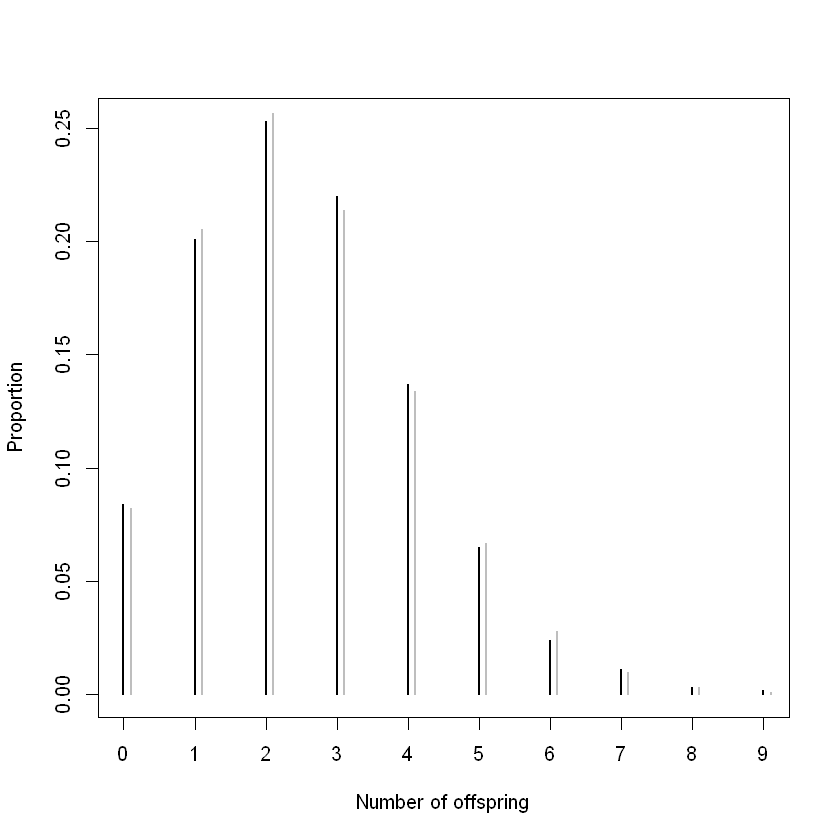

In [6]:
# note defining signature of function great way to get started!
genKids = function(bTime, cTime, lambda = 0.5, kappa = 0.3) {    # four parameters in function definition 
         # Parent job born at bTime and completes at cTime
    
         # Birth time of first child
    mostRecent = rexp(1, rate = lambda) + bTime
    kidBirths = numeric()

    while (mostRecent < cTime) {
      kidBirths = c(kidBirths, mostRecent)
      mostRecent = mostRecent  + rexp(1, rate = lambda) 
    }
    
         # generate lifetimes for all offspring
    numKids = length(kidBirths)
    runtime = rexp(numKids, rate = kappa)
    kidCompletes = rep(cTime, numKids) + runtime
    
    data.frame(births = kidBirths, 
               completes = kidCompletes)
}

set.seed(seedx)   # reset the seed in case we lost track

genKids(1, 6)

genKids(1, 6)

genKids(1, 6)    # up arrow + return to get a feel for how these are "distributed"

# we can this recursively:
genBirth = function(currentTime, cTime, 
                    births = numeric(), lambda = 0.5) {
          
         # Generate birth time of next job after currentTime
    mostRecent = rexp(1, rate = lambda) + currentTime
    
    if (mostRecent > cTime)        # note here we "discard" generated data if it doesn't meet the condition
      return(births)
    else {
      births = c(births, mostRecent)
      genBirth(currentTime = mostRecent, cTime, births, lambda)     # recursive call
    }
  }

# Effectively, the recursive call replaces the `while` loop
# Deep CS concepts here of "tail-recursion" and convergence

# gen kids recursively:
genKidsR = function(bTime, cTime, lambda = 0.5, kappa = 0.3) {
         # Parent job born at bTime and completes at cTime
    
    kidBirths = genBirth(bTime, cTime, lambda = lambda)
    
         # generate lifetimes for all offspring
    numKids = length(kidBirths)
    runtime = rexp(numKids, rate = kappa)
    kidDeaths = rep(cTime, numKids) + runtime
    
    data.frame(births = kidBirths, 
               completes = kidDeaths)
} 

set.seed(seedx)   # reset again

numKids = replicate(1000, nrow(genKids(1, 6)))
mean(numKids)

eprobs = table(numKids)/length(numKids)
probs = dpois(x = 0:max(numKids), lambda = 2.5)

plot(eprobs, type = "h",
     ylab = "Proportion", xlab = "Number of offspring")
segments(x0 = 0.1 + 0:max(numKids), y0 = rep(0, max(numKids)), # nice plotting function: `segments`; goes along with type "h" + stagger by .1
         y1 = probs, col="grey", lwd = 2)

In [7]:
# pdf("numSimOffspring.pdf", width = 8, height = 5)
# oldPar = par(mar = c(4.1, 4.1, 1, 1))
# 
# plot(eprobs, type = "h",
#      ylab = "Proportion", xlab = "Number of offspring")
# segments(x0 = 0.1 + 0:max(numKids), 
#          y0 = rep(0, max(numKids)), y1 = probs,
#          col="grey", lwd = 2)
# 
# par(oldPar)
# dev.off()

# compute the observed proportions vs. theoretical ones
obsCt = table(numKids)
expCt = 1000* c(dpois(0:8, lambda = 2.5), 
                ppois(8, lower.tail = FALSE, lambda = 2.5))

# Compute chi^2 statistic: recall! good for comparing frequencies in buckets
stat = sum((obsCt - expCt)^2/expCt)
paste('P-value from Chi= ', pchisq(stat, df = 9, lower.tail = FALSE))  # 0.9943803 # p-value



# Rewrite above functionality returning a vector, so we can use vector comprehension next 
#(that is, applying a function across a vector)
genKidsU =  function(bTime, cTime, lambda = 0.5, kappa = 0.3) {
         # Generate the birth times and assassination times
         # for the children of a job who is born at bTime 
         # and completed at cTime.
    lambda = (cTime - bTime) * lambda
    numKids = rpois(1, lambda = lambda)
    kidBirths = sort(runif(numKids, min = bTime, max = cTime))
    
    # generate lifetimes for each offspring
    runtime = rexp(numKids, rate = kappa)
    kidDeaths = rep(cTime, numKids) + runtime
    
    return(data.frame(births = kidBirths, completes = kidDeaths))
}

[1] "P-value from Chi=  0.994380309542424"

## Profiling code performance

In [8]:
seedx = 116201412
set.seed(seedx)

time1 = system.time( replicate(4000, genKids(1, cTime = 9)) )
time2 = system.time( replicate(4000, genKidsU(1, cTime = 9)) )

time1/time2

time1 = system.time( replicate(4000, genKids(1, cTime = 100)) )
time2 = system.time( replicate(4000, genKidsU(1, cTime = 100)) )
time1/time2

set.seed(seedx)
Rprof("profGenKids1.out")
invisible( replicate(1000, genKids(1, cTime = 100)) )
Rprof(NULL)

summaryRprof("profGenKids1.out")$by.self

set.seed(seedx)
Rprof("profGenKidsU.out")
invisible( replicate(1000, genKidsU(1, cTime = 100)) )
Rprof(NULL)
summaryRprof("profGenKidsU.out")$by.self

     user    system   elapsed 
0.7752809       NaN 0.7752809 

    user   system  elapsed 
1.268293      NaN 1.296296 

,self.time,self.pct,total.time,total.pct
"""rexp""",0.08,30.77,0.08,30.77
"""c""",0.06,23.08,0.06,23.08
"""structure""",0.04,15.38,0.04,15.38
"""eval""",0.02,7.69,0.26,100.00
"""match.arg""",0.02,7.69,0.04,15.38
"""is.factor""",0.02,7.69,0.02,7.69
"""length""",0.02,7.69,0.02,7.69


,self.time,self.pct,total.time,total.pct
"""structure""",0.04,18.18,0.04,18.18
"""lapply""",0.02,9.09,0.22,100.00
"""as.data.frame""",0.02,9.09,0.10,45.45
"""order""",0.02,9.09,0.06,27.27
"""sort.int""",0.02,9.09,0.06,27.27
"""deparse""",0.02,9.09,0.04,18.18
"""mode""",0.02,9.09,0.04,18.18
"""length""",0.02,9.09,0.02,9.09
"""match.arg""",0.02,9.09,0.02,9.09
"""rexp""",0.02,9.09,0.02,9.09


In [9]:
# apply genKidsU across a vector using `mapply`
genKidsV = function(bTimes, cTimes, lambda = 0.5, kappa = 0.3) {
       # bTimes & cTimes - vector of birth and completion times

       # Determine how many children each job has
  parentAge = cTimes - bTimes
  numKids = rpois(n = length(parentAge), 
                  lambda = lambda*parentAge)
  
       # Determine the birth and completion times of the children
  mapply(function(n, min, max) {
            births = sort(runif(n, min, max))
            runtimes = rexp(n, rate = kappa)
            completes = rep(max, n) + runtimes
            data.frame(births, completes)
         },
         n = numKids , min = bTimes, max = cTimes,
         SIMPLIFY = FALSE)
}

# check the above work with a unit test 7.6
bTimes1 = 1:3
cTimes1 = c(3, 10, 15)

seed1 = 12062013
set.seed(seed1)

kids = genKidsV(bTimes1, cTimes1)
kids


kids2 = genKidsV(bTimes1, cTimes1)
sapply(kids2, nrow)

set.seed(seed1)
kids3 = genKidsV(bTimes = bTimes1, cTimes = cTimes1)
identical(kids, kids3)


# 7.7 Generate kids vectorized returning the ids of the kids and parents
genKidsV = function(bTimes, cTimes, parentID, lambda = 0.5, kappa = 0.3) {
       # Determine how many children each job has
  parentAge = cTimes - bTimes
  numKids = rpois(n = length(parentAge), lambda = lambda * parentAge)
  
  if (sum(numKids) == 0) return(NULL)
  
       # Determine the birth times of the children  
  kidStats = 
    mapply(function(n, min, max) {
      births = sort(runif(n, min, max))
      runtimes = rexp(n, rate = kappa)
      completes = rep(max, n) + runtimes
      data.frame(births, completes)
    },
           n = numKids , min = bTimes, max = cTimes, 
           SIMPLIFY = FALSE)
  
 
  return(data.frame(parentID = rep(parentID, numKids),
                    kidID = 1:sum(numKids), 
                    births = unlist(lapply(kidStats, "[[", "births")), 
                    completes = unlist(lapply(kidStats,"[[", "completes"))
                    ))
}

set.seed(seed1)
genKidsV(bTimes1, cTimes1, parentID = letters[1:3])

births,completes
2.936936,8.919043
births,completes
2.170295,10.31738
3.195751,15.17299
8.713876,16.03113
births,completes
3.172955,16.76033
5.496738,15.50458
9.779638,20.46424
10.325540,24.80465


[1] 2 4 6

[1] TRUE

parentID,kidID,births,completes
a,1,2.936936,8.919043
b,2,2.170295,10.317380
b,3,3.195751,15.172991
b,4,8.713876,16.031133
c,5,3.172955,16.760326
c,6,5.496738,15.504584
c,7,9.779638,20.464240
c,8,10.325540,24.804648


## Family tree

In [63]:
familyTree = function(lambda = 0.5, kappa = 0.3, maxGen = 10) {
       # maxGen - maximum number of generations to observe
       # Return value - a list with 1 data frame per generation.
  allGens = vector(mode = "list", length = maxGen)
  
       # Generate the root of the tree
  allGens[[1]] = data.frame(parentID = 0, kidID = 1, births = 0,
                            completes = rexp(1, rate = kappa))
  
       # Generate future generations, one at a time.
  for (i in 2:maxGen) {
    nextGen = genKidsV(bTimes = allGens[[ (i - 1) ]]$births,
                       cTimes = allGens[[ (i - 1) ]]$completes,
                       parentID = allGens[[ (i - 1) ]]$kidID,
                       lambda = lambda, kappa = kappa)
    if (is.null(nextGen)) return(allGens[ 1:(i - 1) ])
    allGens[[ i ]] = nextGen
  }
  
  return(allGens)
      
}
    

In [11]:

set.seed(seed1)
tree = familyTree(lambda = 0.4, kappa = 1, maxGen = 10)

pdf("BA_FamilyTree.pdf", width = 8, height = 5)
oldPar = par(mar = c(4.1, 4.1, 0.5, 0.5))

set.seed(seed1)
g = familyTree(lambda = 0.4, kappa = 1, maxGen = 10)

maxLife = max(sapply(g, function(gen) max(gen$completes)))
numFamily = sum(sapply(g, nrow))

plot(0,0, ylim = c(0.5, numFamily + 0.5), xlim = c(0, maxLife),
     xlab = "Time", ylab = "", type ="n",
     axes = FALSE)

box()
axis(1)
numGen = length(g)
numKids = sapply(g, nrow)
treeN = g[ 2:(numGen + 1) ]
birthNum = c(0, cumsum(sapply(g, nrow))[ -length(g)])
axis(2, at = birthNum + 1, 
     labels = paste("Gen", 1:numGen), tick = FALSE, las = 1)

mapply(function(gen, nextGen, birthNum) {
  birthOrder = birthNum + (1:nrow(gen))
  segments(x0 = gen$births, x1 = gen$completes, y0 = birthOrder,
          lwd = 3, col = "grey")
  abline(h = 0.5 + max(birthOrder), lty = 2, col="black" )
  if (all(!is.na(nextGen$births)))
  points(x = nextGen$births, y = birthOrder[nextGen$parentID],
         pch = 4)
  },
  gen = g, nextGen = treeN, birthNum = birthNum )
par(oldPar)
dev.off()

seed2 = 12212013
set.seed(seed2)
tree = familyTree(lambda = 0.3, kappa = 0.5, maxGen = 10)

length(tree)

sapply(tree, nrow)

sum(sapply(tree, nrow))

set.seed(seed2)
tree = familyTree(lambda = 0.3, kappa = 0.5, maxGen = 15)
sapply(tree[ - (1:9) ], nrow)

set.seed(seed2)
tree = familyTree(lambda = 1, kappa = 0.5, maxGen = 10)

length(tree)

sapply(tree, nrow)

sum(sapply(tree, nrow))

tree = familyTree(lambda = 1, kappa = 0.5, maxGen = 10)
sum(sapply(tree, nrow))

sapply(tree, function(gen) range(gen$births))

sapply(tree, function(gen) range(gen$completes))

familyTreeT = function(lambda = 0.5, kappa = 0.3, maxTime = 8) {
       # maxTime - maximum length of time to observe the process
  allGens = list()
  
       # Generate the root of the 
  allGens[[1]] = data.frame(parentID = NA, kidID = 1, 
                            births = 0, 
                            completes = rexp(1, rate = kappa))
  
       # Generate the future generations, one at a time.
  numGens = 1
  while (TRUE) {
    nextGen = genKidsV(bTimes = allGens[[ numGens ]]$births,
                       cTimes = allGens[[ numGens ]]$completes,
                       parentID = allGens[[ numGens ]]$kidID,
                       lambda = lambda, kappa = kappa)
    
    if ( is.null(nextGen) | (min(nextGen$births) > maxTime) ) {
           # If complete after maxTime set complete to NA
      allGens = lapply(allGens, function(gen) {
        gen$completes[ gen$completes > maxTime ] = NA
        gen
      })
      return(allGens)
    }
    
    # Drop those born after maxTime 
    nextGen = nextGen[ nextGen$births <= maxTime , ]
    nextGen$kidID = 1:nrow(nextGen)
    numGens = numGens + 1
    allGens[[ numGens ]] = nextGen    
  }  
}	

familyTree = function(lambda = 0.5, kappa = 0.3, 
                      maxGen = 10, maxOffspring = 1000) {

       # Return value - a list with 1 data frame per generation.
  allGens = vector(mode = "list", length = maxGen)
  
       # Generate root of the tree
  allGens[[1]] = data.frame(parentID = NA, kidID = 1, 
                            births = 0, 
                            completes = rexp(1, rate = kappa))
  
  currentNumOffspring = 0

       # Generate future generations, one at a time.
  for (i in 2:maxGen) {
    nextGen = genKidsV(bTimes = allGens[[ (i - 1) ]]$births,
                       cTimes = allGens[[ (i - 1) ]]$completes,
                       parentID = allGens[[ (i - 1) ]]$kidID,
                       lambda = lambda, kappa = kappa)
    if (is.null(nextGen)) return(allGens[ 1:(i - 1) ]) 
    allGens[[ i ]] = nextGen
    currentNumOffspring = currentNumOffspring + nrow(nextGen)
    if (currentNumOffspring > maxOffspring) 
      return(allGens[1:i])
  }  
  allGens
}

set.seed(seed2)
tree = familyTree(lambda = 1, kappa = 0.5, 
                  maxGen = 100, maxOffspring = 1000)

length(tree)

sapply(tree, nrow)

sum(sapply(tree, nrow))

set.seed(seed2)
treeVT = familyTreeT(lambda = 1, kappa = 0.5)

numGen = 5
treeSub = treeVT[1:numGen]
numKids = sapply(treeSub, nrow)
numFamily = sum(numKids)

treeSub = lapply(treeSub, 
                 function(gen) {
                   gen$completes[ is.na(gen$completes) ] = 8
                   gen
                   })

treeSubN = treeVT[ 2:(numGen + 1) ]
treeSubN = lapply(treeSubN, 
                  function(gen) {
                    gen$completes[ is.na(gen$completes) ] = 8
                    gen
                 })
  
maxLife = max(sapply(treeSub, function(gen) max(gen$completes)))

birthNum = c(0, cumsum(numKids)[ -numGen ])

pdf("BA_FamilyTreeVT.pdf", width = 8, height = 15)
oldPar = par(mar = c(4.1, 4.1, 0.5, 0.5))

plot(0,0, ylim = c(0.5, numFamily), xlim = c(0, maxLife),
     xlab = "Time", ylab = "", type ="n",
     axes = FALSE)

box()
axis(1)
axis(2, at = birthNum + c(0.5, rep(1, (numGen-1))), 
     labels = paste("Gen", 1:numGen), tick = FALSE, las = 1)

mapply(function(gen, nextGen, birthNum) {
  birthOrder = birthNum + (1:nrow(gen))
  segments(x0 = gen$births, x1 = gen$completes, y0 = birthOrder,
           lwd = 3, col = "grey")
  abline(h = 0.5 + max(birthOrder), lty = 2, col="black" )
  points(x = nextGen$births, y = birthOrder[nextGen$parentID],
           pch = 4)
}, gen = treeSub, nextGen = treeSubN, birthNum = birthNum )

abline(v = maxLife)

par(oldPar)
dev.off()

Warning message in is.na(nextGen$births):
"is.na() applied to non-(list or vector) of type 'NULL'"

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

png 
  2

[1] 10

[1]   1   1   1   5   7   5  13  39  81 147

[1] 300

[1]  147  286  572 1130 2231 4666

[1] 10

[1]      1      3      7     19     99    464   2616  15155  90848 561791

[1] 671003

[1] 989086

0,0.009460001,0.3108085,0.5372426,1.033442,1.661756,2.055077,3.311186,3.967747,4.095898
0,0.009460001,3.3884639,6.6886600,12.624078,20.301736,27.312525,37.166142,49.842720,58.438001


0.2136832,4.476301,5.257532,5.934544,6.46038,6.852209,7.282368,7.944772,8.343729,9.490732
0.2136832,4.476301,8.428051,13.091012,21.98339,27.514912,37.433661,50.030282,58.562122,70.258593


[1] 7

[1]    1    3    7   19   99  464 2616

[1] 3209

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

png 
  2

## Replicating the simulation

In [ ]:
exptOne = function(l, k, mG, mO){
       # Helper function to call familyTree
       # Returns - summary statistics for analysis,
  
  aTree = familyTree(lambda = l, kappa = k, maxGen = mG,
                      maxOffspring = mO)
  numGen = length(aTree)
  numJobs = sum(sapply(aTree, nrow))
  c(numGen, numJobs)
}

set.seed(seed2)
exptOne(1, 0.5, 100, 1000)

familyTreeT = function(lambda = 0.5, kappa = 0.3, maxTime = 8) {
  # maxTime - maximum length of time to observe the family
  allGens = list()
  
  # Generate the root of the 
  allGens[[1]] = data.frame(parentID = NA, kidID = 1, 
                            births = 0, 
                            completes = rexp(1, rate = kappa))
  
  # Generate the future generations, one at a time.
  numGens = 1
  while (TRUE) {
    nextGen = genKidsV(bTimes = allGens[[ numGens ]]$births,
                       cTimes = allGens[[ numGens ]]$completes,
                       parentID = allGens[[ numGens ]]$kidID,
                       lambda = lambda, kappa = kappa)
    
    treeTerminated = is.null(nextGen)
    if ( !treeTerminated ) {
      birthsPastObsTime = min(nextGen$births) > maxTime
    }
    else birthsPastObsTime = TRUE
    
    if ( treeTerminated | birthsPastObsTime ) {
      # If complete after maxTime set complete to NA
      allGens = lapply(allGens, function(gen) {
        gen$completes[ gen$completes > maxTime ] = NA
        gen
      })
      return(allGens)
    }
    
    # Drop those born after maxTime 
    nextGen = nextGen[ nextGen$births <= maxTime , ]
    nextGen$kidID = 1:nrow(nextGen)
    numGens = numGens + 1
    allGens[[ numGens ]] = nextGen    
  }  
}

MCBA = function(params, repeats = 5, mG = 10, mO = 1000){
       # params: matrix columns of lambda and kappa values
       # For each lambda and kappa pair, run "repeats" times
  
  n = nrow(params)
  mcResults = vector("list", length = n)
  
  for (i in 1:n) {
    cat("param set is ", i, "\n")
    mcResults[[i]] = replicate(repeats,
                               exptOne(l = params[i, 1],
                                       k = params[i, 2],
                                       mG = mG, mO = mO))
  }
  mcResults
}

trialKappas = c(0.1, 10, 0.1, 10)
trialLambdas = c(0.1, 0.1, 10, 10)
trialParams = matrix(c(trialLambdas, trialKappas), ncol = 2)
mcTrialOutput = MCBA(params = trialParams, repeats = 100, 
                     mG = 200, mO = 100000)

save(mcTrialOutput, file = "mcTrialOutput.rda")

pdf("BA_ScatterPlotNumGenByNumKids.pdf", width = 10, height = 8)

oldPar = par(mfrow = c(2, 2), mar = c(3,3,1,1))

mapply(function(oneSet, lambda, kappa) {
  plot(x = oneSet[2,], y = jitter(oneSet[1, ], 1), log = "x",
       ylim = c(1,20), xlim = c(1, 10^7), pch = 19, cex = 0.6)
  text(x = 50, y = 15, bquote(paste(lambda == .(lambda))) )
  text(x = 300, y = 15, bquote(paste(kappa == .(kappa))) )
  }, 
  mcTrialOutput, lambda = trialLambdas, kappa = trialKappas)

par(oldPar)

dev.off()

lambdas = c(seq(0.1, 0.6, by = 0.1), seq(0.8, 2, by = 0.2), 
            seq(2.25, 3, by = 0.25))
kappas = c(lambdas, 3.25, 3.50, 3.75, 4.00, 4.50, 5.00)

paramGrid = as.matrix(expand.grid(lambdas, kappas))

pdf("BA_Scatterplot3Dkids.pdf", width = 7, height = 6)

mcGrid = MCBA(params = paramGrid, repeats = 400, mG = 20,
                mO = 1000)

save(mcGrid, file = "mcGridOutput.rda")

logUQkids = sapply(mcGrid, function(x) 
               log(quantile(x[2, ], probs = 0.75), base = 10))

UQCut = cut(logUQkids, breaks = c(-0.1, 0.5, 2, max(logUQkids)) )
color3 = c("#b3cde3aa", "#8856a7aa", "#810f7caa")
colors = color3[UQCut]

library(scatterplot3d)
sdp = scatterplot3d(x = paramGrid[ , 1], y = paramGrid[ , 2], 
                    z = logUQkids, pch = 15, color = colors,
                    xlab = "Lambda", ylab = "Kappa",
                    zlab = "Upper Quartile Offspring",
                    angle = 120, type="h")

legend("left", inset = .08, bty = "n", cex = 0.8,
       legend = c("[0, 0.5)", "[0.5, 2)", "[2, 5)"), 
       fill = color3)

dev.off()

pdf("BA_ImageMapAlive.pdf", width = 7, height = 7)
oldPar  = par(mar = c(4.1, 4.1, 0.5, 0.5))

mcGridAlive = sapply(mcGrid, function(oneParamSet) {
  sum((oneParamSet[1,] == 20) | (oneParamSet[2,] > 1000)) / 
    length(oneParamSet[2,]) })

filled.contour(lambdas, kappas, 
               matrix(mcGridAlive, nrow = length(lambdas), 
                      ncol = length(kappas)), 
               xlab = "Lambda", ylab = "Kappa", 
               xlim = c(0.1, 3), ylim = c(0.1, 3.1)) 

par(oldPar)
dev.off()

pdf("BA_ImageMapAtleast20Kids.pdf", width = 7, height = 7)
oldPar  = par(mar = c(4.1, 4.1, 2, 1))

mcGridProp20kids = sapply(mcGrid, function(oneParamSet) {
  sum(oneParamSet[2,] > 19) / length(oneParamSet[2,]) })

mcGridProp20kidsMat = matrix(mcGridProp20kids, 
                             nrow = length(lambdas), 
                             ncol = length(kappas))

breaks = c(0, 0.10, 0.2, 0.3, 0.5, 0.7, 0.9, 1)
colors = rev(rainbow(10))[-(1:3)]

image(lambdas, kappas, mcGridProp20kidsMat, col = colors,
      breaks = breaks, xlab = "Lambda", ylab = "Kappa", 
      xlim = c(0.05, 3.05), ylim = c(0.05, 3.05))

midBreaks = (breaks[ -8 ] + breaks[ -1 ]) / 2
legend(x = 0.1, y = 3.25, legend = midBreaks, fill = cols, 
       bty = "n", ncol = 7,  xpd = TRUE)

par(oldPar)
dev.off()

[1]    7 3209

param set is  1 
param set is  2 
param set is  3 
param set is  4 


[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

png 
  2

# Q.6 - Make a Custom Visualization

Figure 7.4 in the book, is a custom visualization of the birth and completion times for a tree. Design an alternative custom visualization of the return value from familyTree().
<hr>

__Solution:__ <br>
First, we go through and learn that the return value for    <span class="burk">```familyTree()``` </span> is a list of dataFrames. Also, the Parent/Root Node is of parentID return value of "NA" which was changed in the function to 0 for simplicity and uniformness of numeric data. We leverage in R the dplyr package to utilize    <span class="burk">```bind_rows()```</span> to combine into one dataframe. Then we construct some simple preliminary statistics, summary, groupbys, and barplot of what we are looking at overall.

Naturally, we then wanted to see how _Dendrograms_ and _Phylogenetic_ plots looked when handling hierarchical data. It was very interesting to see how the plots changed over the different groupings.

      df               parentID         kidID           births      
 Length:9           Min.   :0.000   Min.   :1.000   Min.   :0.0000  
 Class :character   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:0.2921  
 Mode  :character   Median :1.000   Median :2.000   Median :0.7177  
                    Mean   :1.556   Mean   :1.778   Mean   :1.2531  
                    3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.5742  
                    Max.   :3.000   Max.   :3.000   Max.   :3.1118  
   completes     
 Min.   :0.8245  
 1st Qu.:2.4800  
 Median :4.2913  
 Mean   :3.4480  
 3rd Qu.:4.7825  
 Max.   :5.5010  

df,parentID,kidID,births,completes
1,0,1,0.0000000,0.8244658
2,1,1,0.1908525,0.9280697
2,1,2,0.4631948,4.6525607
3,1,1,0.2921203,2.4799670
3,1,2,0.7177455,2.7374096
3,2,3,1.3348405,4.7825003
4,2,1,2.5742173,4.2912875
4,3,2,2.5931320,5.5009648
4,3,3,3.1117844,4.8347507


parentID,kidID,CompFreq,BirthFreq
0,1,0.8244658,0.0000000
1,1,3.4080367,0.4829728
1,2,7.3899704,1.1809402
2,1,4.2912875,2.5742173
2,3,4.7825003,1.3348405
3,2,5.5009648,2.5931320
3,3,4.8347507,3.1117844


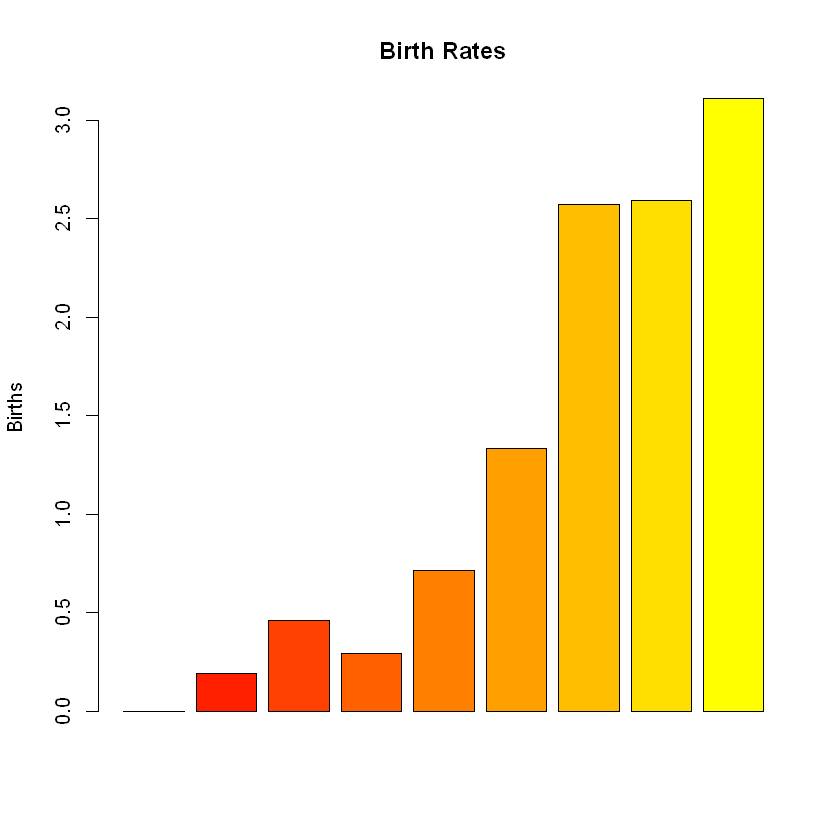

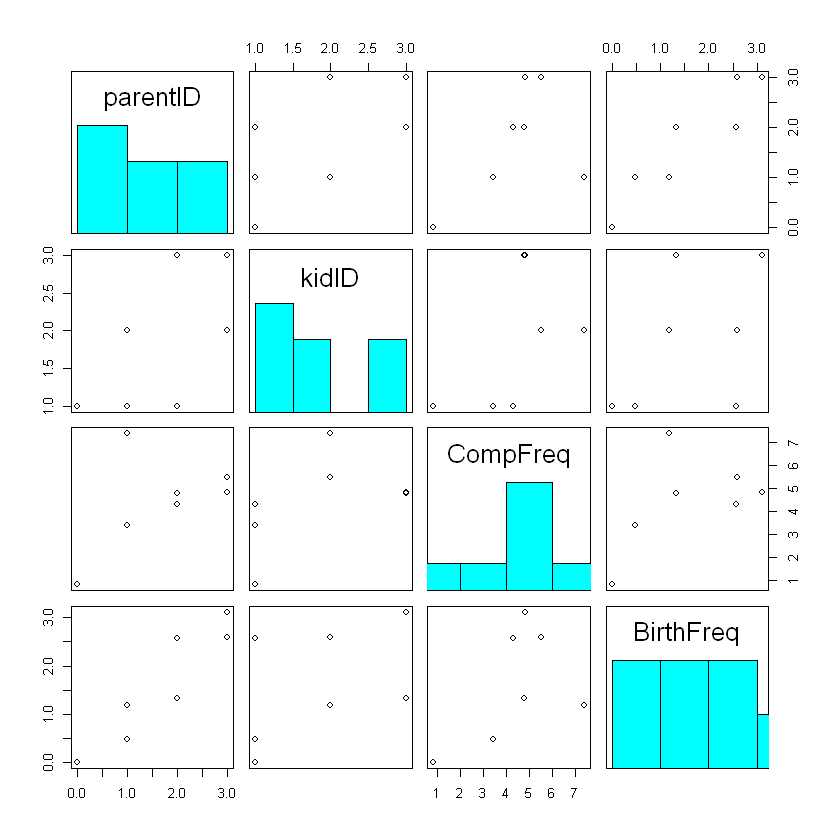

In [188]:
set.seed(seed1)
tree = familyTree(lambda = 0.4, kappa = 1, maxGen = 10)

library(dplyr)
df = bind_rows(tree, .id="df")
summary(df)
df

# Simple BarPlot to see BirthRates
barplot(height = df$births, ylab = 'Births',
       col = heat.colors(12), angle=df$completes, main='Birth Rates')


# GroupBy the DataFrame - ParentID ~ KidID (2 Levels)
grp <- df %>% 
  group_by(parentID, kidID) %>% 
  summarise(CompFreq = sum(completes), BirthFreq= sum(births) )

grp


# Function for diagonal histograms in the pairplot
panel.hist <- function(x, ...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5) )
    h <- hist(x, plot = FALSE)
    breaks <- h$breaks; nB <- length(breaks)
    y <- h$counts; y <- y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y, col = "cyan", ...)
}
pairs(grp, diag.panel=panel.hist)


## Dendrograms and Phylogenetic Fans
<hr>

We will first start off with the Original DataFrame

In [179]:
df

df,parentID,kidID,births,completes
1,0,1,0.0000000,0.8244658
2,1,1,0.1908525,0.9280697
2,1,2,0.4631948,4.6525607
3,1,1,0.2921203,2.4799670
3,1,2,0.7177455,2.7374096
3,2,3,1.3348405,4.7825003
4,2,1,2.5742173,4.2912875
4,3,2,2.5931320,5.5009648
4,3,3,3.1117844,4.8347507


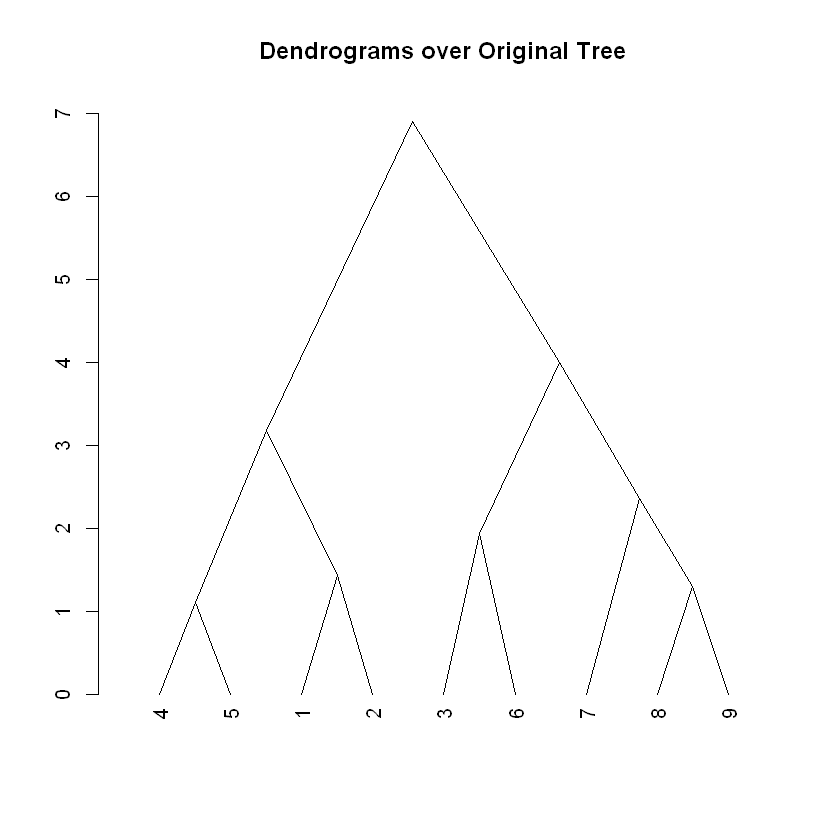

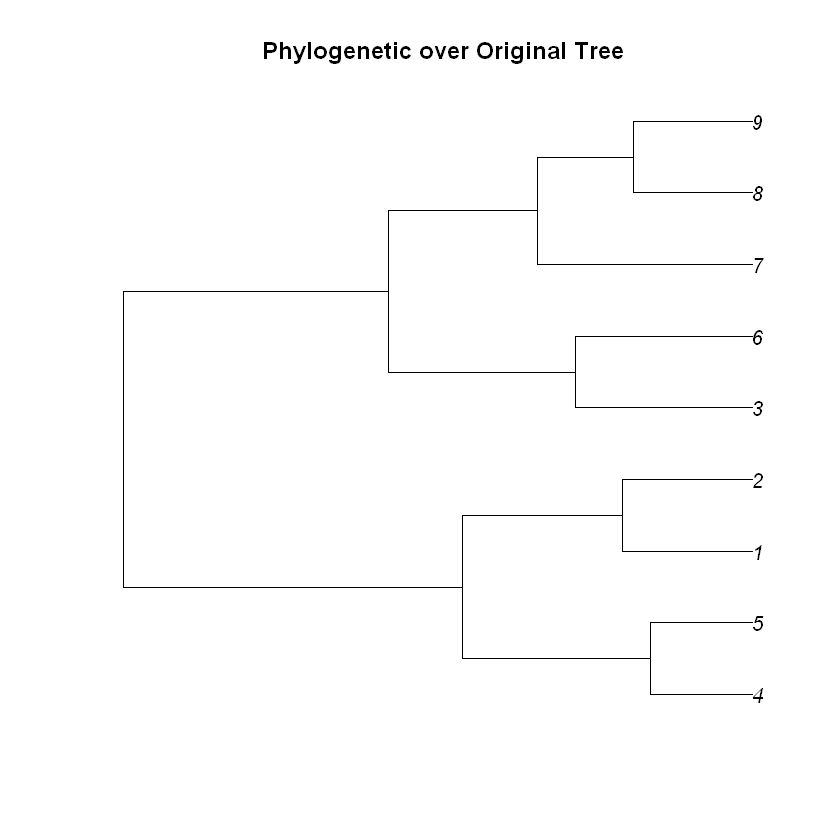

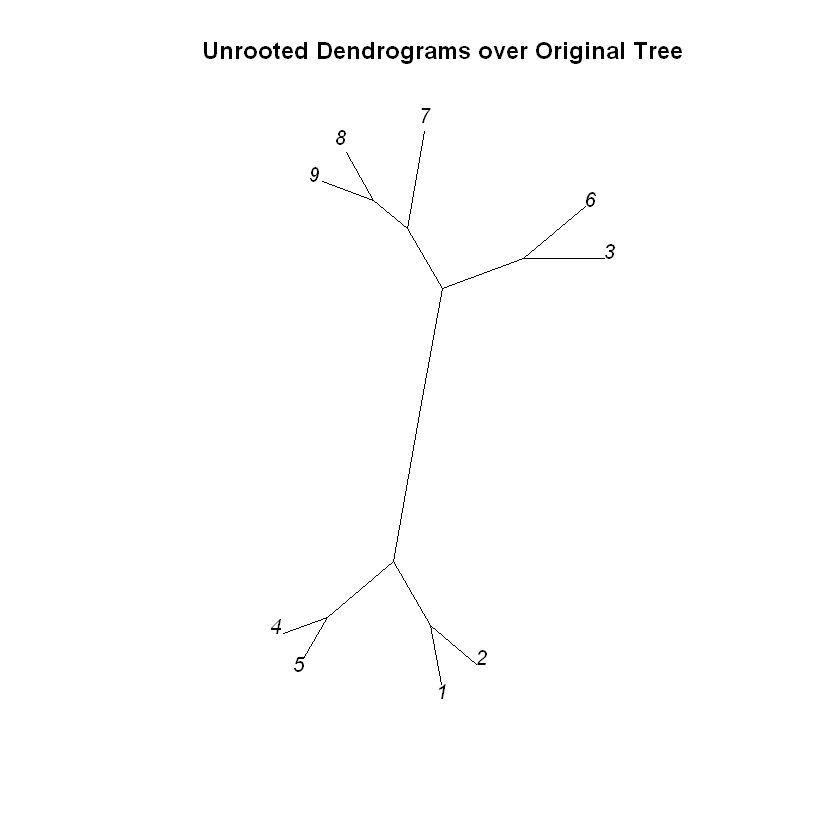

In [184]:
# install.packages('ape', repos='http://cran.us.r-project.org')
library(ape)

# Dendo and Phylo the regular dataFrame DF
hc = hclust(dist(df))
hcd = as.dendrogram(hc)
plot(hcd, type='triangle', main='Dendrograms over Original Tree')
plot(as.phylo(hc), main='Phylogenetic over Original Tree')

# Try Unrooted 
plot(as.phylo(hc), type='unrooted', main='Unrooted Dendrograms over Original Tree')

### Dendrograms and Phylogenetic Fans with Groupby
<hr>

Now observe the Groupby Data - ParentID and KidID

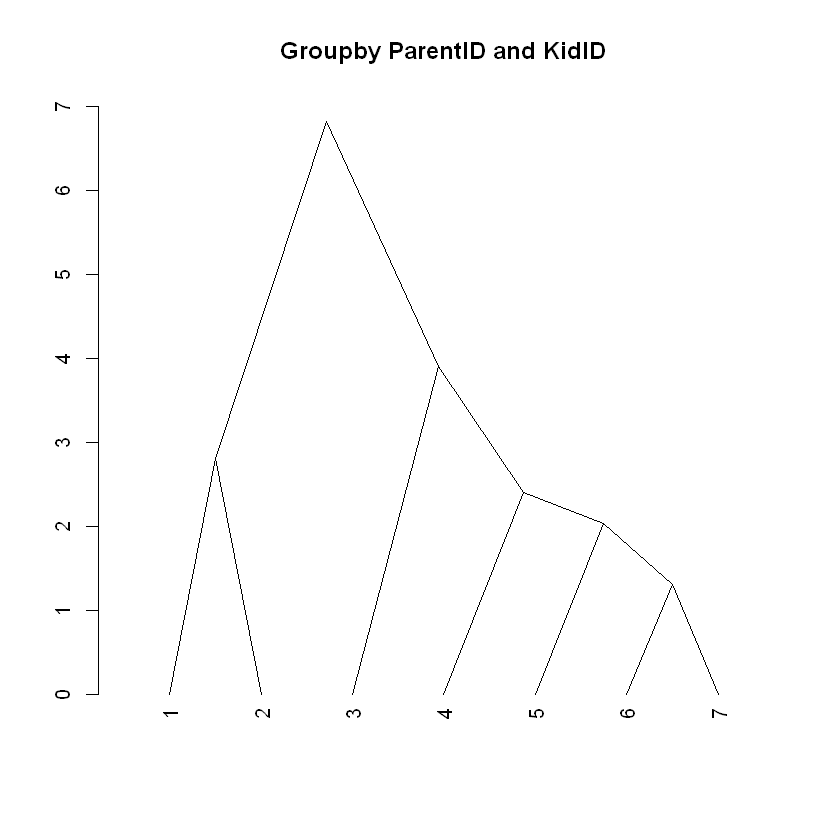

parentID,kidID,CompFreq,BirthFreq
0,1,0.8244658,0.0000000
1,1,3.4080367,0.4829728
1,2,7.3899704,1.1809402
2,1,4.2912875,2.5742173
2,3,4.7825003,1.3348405
3,2,5.5009648,2.5931320
3,3,4.8347507,3.1117844


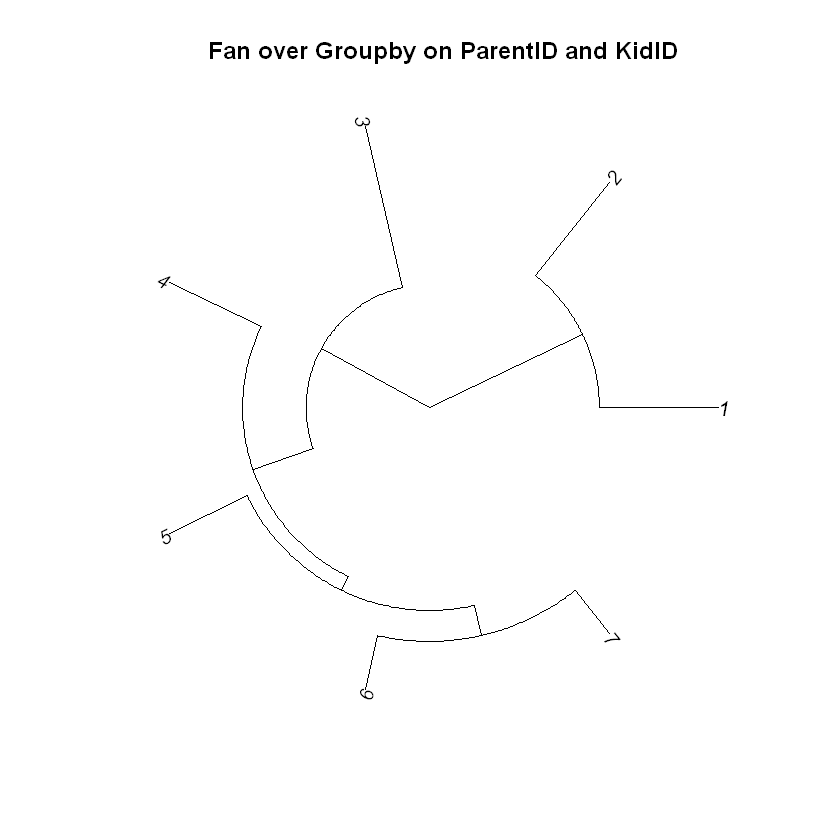

In [178]:
# Dendo the Groupby on ParentID and KidID
hc = hclust(dist(grp))
hcd = as.dendrogram(hc)
plot(hcd, type='triangle', main='Groupby ParentID and KidID')
plot(as.phylo(hc), type = "fan", main='Fan over Groupby on ParentID and KidID')
grp

### Dendrograms and Phylogenetic Fans with Groupby
<hr>

Now observe the Groupby Data - ParentID.  Below we graph the relationship between parent and child nodes using two separate visualizations: dendrograms and phylogenetic fans.  Given the relatively shallow depth the dendrogram appears to convey the information more clearly; however, the phylogenetic fan may be better suited for deeper graphs (child nodes with more offspring).

parentID,CompFreq,BirthFreq
0,0.8244658,0.000000
1,10.7980071,1.663913
2,9.0737878,3.909058
3,10.3357156,5.704916


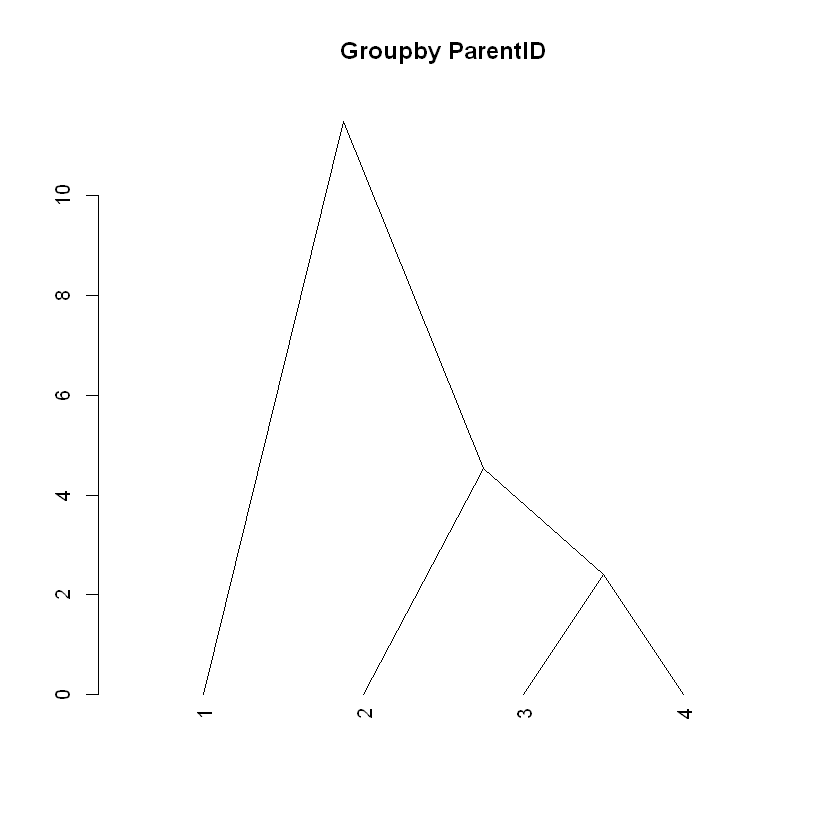

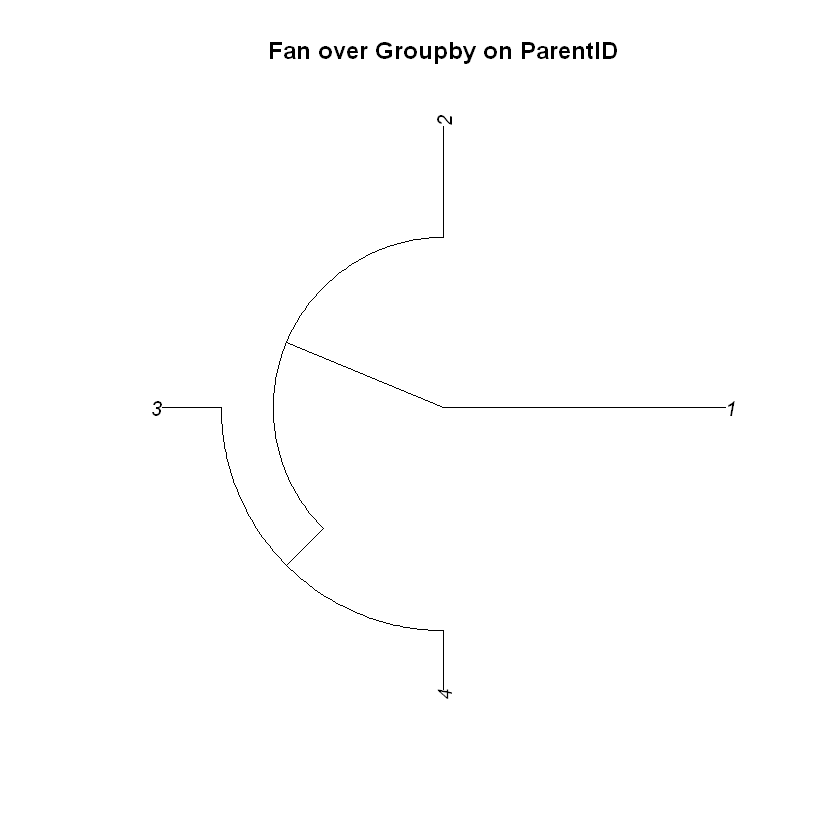

In [189]:
# GroupBy the DataFrame - ParentID
grp2 <- df %>% 
  group_by(parentID) %>% 
  summarise(CompFreq = sum(completes), BirthFreq= sum(births) )

grp2

# Dendo the Groupby on ParentID
hc = hclust(dist(grp2))
hcd = as.dendrogram(hc)
plot(hcd, type='triangle', main='Groupby ParentID')
plot(as.phylo(hc), type = "fan", main='Fan over Groupby on ParentID')


# Conclusion

The visuals are the way to go when trying to communicate the translation between the numbers and what is going on. You can quickly digest the information as opposed to tediously reading through the numbers. The Dendrograms and Phylogenetic Fans do a great job showing hierarchical relationships between parent's and children that could go unnoticed thumbing through a dataframe. This is especially true in situations where child nodes spawn children of their own and the relationships become increasingly complex.